In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank= pd.read_csv('bank-full.csv', sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [6]:
bank.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [7]:
bank.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [8]:
bank['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [9]:
bank=bank.drop(['contact'], axis=1)

In [10]:
bank

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,unknown,no


In [11]:
bank1=bank.copy()

In [12]:
bank1['job']=bank.job.factorize()[0]

In [13]:
bank1

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,1,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,2,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,3,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,4,single,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,unknown,yes
45207,71,5,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,unknown,yes
45208,72,5,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,success,yes
45209,57,3,married,secondary,no,668,no,no,17,nov,508,4,-1,0,unknown,no


In [14]:
bank['job']=bank.job.factorize()[0]

In [15]:
bank['marital']=bank.marital.factorize()[0]
bank['education']=bank.education.factorize()[0]
bank['housing']=bank.housing.factorize()[0]
bank['loan']=bank.loan.factorize()[0]
bank['month']=bank.month.factorize()[0]
bank['poutcome']=bank.poutcome.factorize()[0]

In [16]:
bank=bank.drop(['default'],axis=1)
bank

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,2143,0,0,5,0,261,1,-1,0,0,no
1,44,1,1,1,29,0,0,5,0,151,1,-1,0,0,no
2,33,2,0,1,2,0,1,5,0,76,1,-1,0,0,no
3,47,3,0,2,1506,0,0,5,0,92,1,-1,0,0,no
4,33,4,1,2,1,1,0,5,0,198,1,-1,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,825,1,0,17,5,977,3,-1,0,0,yes
45207,71,5,2,3,1729,1,0,17,5,456,2,-1,0,0,yes
45208,72,5,0,1,5715,1,0,17,5,1127,5,184,3,3,yes
45209,57,3,0,1,668,1,0,17,5,508,4,-1,0,0,no


In [17]:
from sklearn import preprocessing
encoder= preprocessing.LabelEncoder()
bank['y']=encoder.fit_transform(bank['y'])

In [18]:
bank

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,2143,0,0,5,0,261,1,-1,0,0,0
1,44,1,1,1,29,0,0,5,0,151,1,-1,0,0,0
2,33,2,0,1,2,0,1,5,0,76,1,-1,0,0,0
3,47,3,0,2,1506,0,0,5,0,92,1,-1,0,0,0
4,33,4,1,2,1,1,0,5,0,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,825,1,0,17,5,977,3,-1,0,0,1
45207,71,5,2,3,1729,1,0,17,5,456,2,-1,0,0,1
45208,72,5,0,1,5715,1,0,17,5,1127,5,184,3,3,1
45209,57,3,0,1,668,1,0,17,5,508,4,-1,0,0,0


<AxesSubplot:xlabel='y', ylabel='count'>

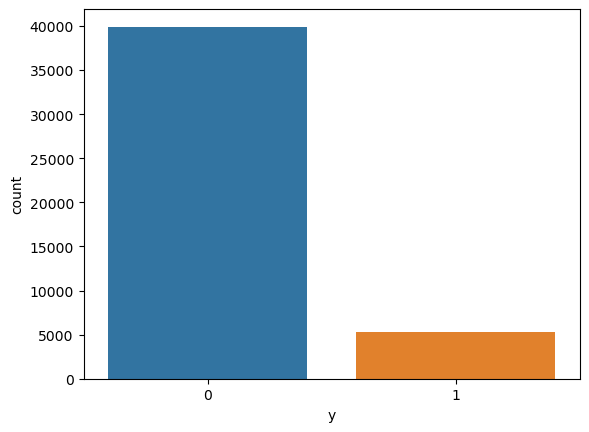

In [19]:
sn.countplot(x='y',data=bank)

In [20]:
pd.crosstab(bank.y, bank.age)

age,18,19,20,21,22,23,24,25,26,27,...,85,86,87,88,89,90,92,93,94,95
y,,,,,,,,,,,,,,,,,,,,,
0,5,24,35,57,89,158,234,414,671,768,...,1,5,1,2,3,0,0,0,1,1
1,7,11,15,22,40,44,68,113,134,141,...,4,4,3,0,0,2,2,2,0,1


In [21]:
pd.crosstab(bank.y,bank.housing)

housing,0,1
y,,
0,23195,16727
1,1935,3354


<AxesSubplot:xlabel='y'>

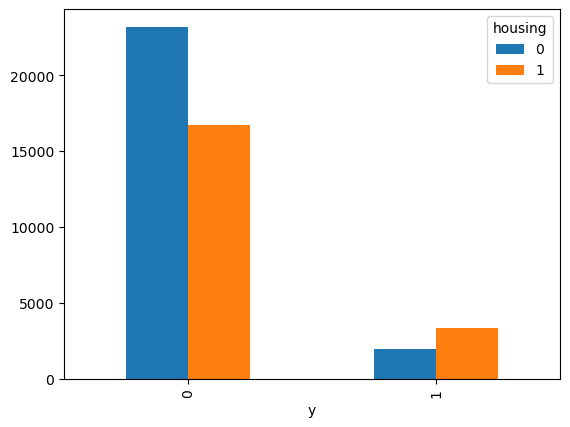

In [22]:
pd.crosstab(bank.y,bank.housing).plot(kind='bar')

<AxesSubplot:xlabel='y'>

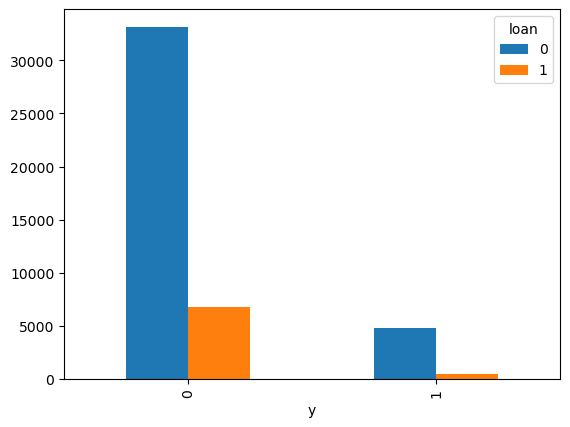

In [23]:
pd.crosstab(bank.y, bank.loan).plot(kind='bar')

In [24]:
pd.crosstab(bank.y, bank.loan)

loan,0,1
y,,
0,33162,6760
1,4805,484


In [25]:
pd.crosstab(bank.y, bank.balance)

balance,-8019,-6847,-4057,-3372,-3313,-3058,-2827,-2712,-2604,-2282,...,58544,58932,59649,64343,66653,66721,71188,81204,98417,102127
y,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [26]:
pd.crosstab(bank.y, bank.education)

education,0,1,2,3
y,,,,
0,11305,20752,1605,6260
1,1996,2450,252,591


<AxesSubplot:xlabel='y'>

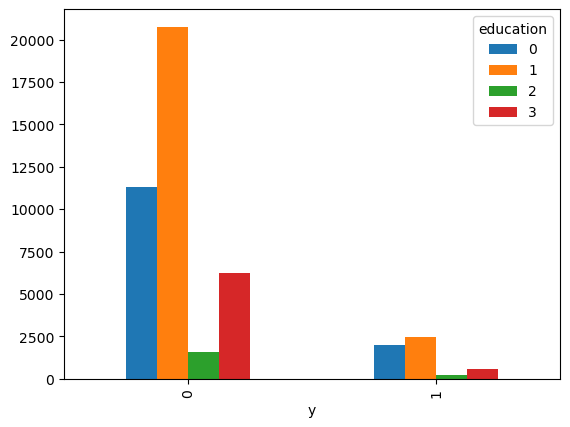

In [27]:
pd.crosstab(bank.y, bank.education).plot(kind='bar')

In [28]:
pd.crosstab(bank.y, bank.poutcome)

poutcome,0,1,2,3
y,,,,
0,33573,4283,1533,533
1,3386,618,307,978


<AxesSubplot:xlabel='y'>

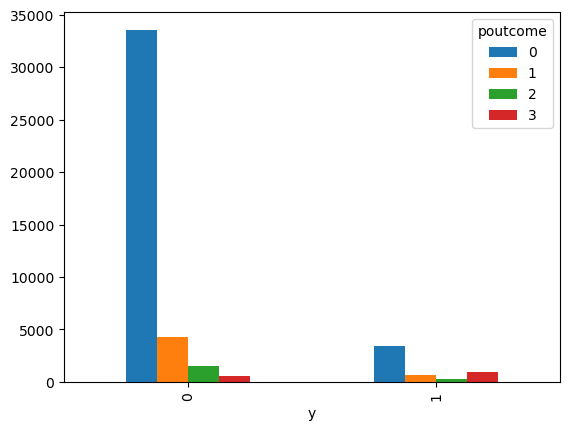

In [29]:
pd.crosstab(bank.y, bank.poutcome).plot(kind='bar')

In [30]:
pd.crosstab(bank.y, bank.pdays)

pdays,-1,1,2,3,4,5,6,7,8,9,...,805,808,826,828,831,838,842,850,854,871
y,,,,,,,,,,,,,,,,,,,,,
0,33570,9,35,1,1,11,9,7,25,9,...,0,1,1,0,1,1,0,1,0,1
1,3384,6,2,0,1,0,1,0,0,3,...,1,0,0,1,0,0,1,0,1,0


In [31]:
pd.crosstab(bank.y, bank.previous)

previous,0,1,2,3,4,5,6,7,8,9,...,32,35,37,38,40,41,51,55,58,275
y,,,,,,,,,,,,,,,,,,,,,
0,33570,2189,1650,848,543,338,194,151,90,68,...,1,1,2,2,1,1,1,0,0,1
1,3384,583,456,294,171,121,83,54,39,24,...,0,0,0,0,0,0,0,1,1,0


In [32]:
pd.crosstab(bank.age, bank.job)

job,0,1,2,3,4,5,6,7,8,9,10,11
age,,,,,,,,,,,,
18,0,0,0,0,0,0,0,0,0,0,0,12
19,0,0,0,0,0,0,0,0,0,0,0,35
20,0,0,0,4,0,0,2,1,0,0,0,43
21,2,4,1,14,0,0,5,4,0,3,0,46
22,6,8,0,15,0,0,14,18,2,1,2,63
...,...,...,...,...,...,...,...,...,...,...,...,...
90,0,0,0,0,0,2,0,0,0,0,0,0
92,0,0,0,0,0,2,0,0,0,0,0,0
93,0,0,0,0,0,2,0,0,0,0,0,0


In [33]:
pd.crosstab(bank.loan, bank.duration)

duration,0,1,2,3,4,5,6,7,8,9,...,3102,3183,3253,3284,3322,3366,3422,3785,3881,4918
loan,,,,,,,,,,,,,,,,,,,,,
0,2,1,2,3,12,27,42,61,72,69,...,1,0,0,1,1,1,0,1,1,1
1,1,1,1,1,3,8,3,12,13,8,...,0,1,1,0,0,0,1,0,0,0


In [35]:
x= bank.iloc[:, :-1]
Y= bank.iloc[:,-1]
classifier=LogisticRegression()
classifier.fit(x,Y)

LogisticRegression()

In [36]:
classifier.coef_

array([[-4.33856392e-02, -7.91283556e-02, -4.00968940e-02,
        -1.34482497e-01,  2.50913202e-05,  1.31358590e-01,
        -6.88826386e-02, -3.46381256e-02,  6.85249236e-02,
         3.33391525e-03, -3.29965503e-01, -6.36864062e-04,
         1.17215710e-01,  2.58452199e-01]])

In [37]:
classifier.predict_proba(x)

array([[0.90129404, 0.09870596],
       [0.90701904, 0.09298096],
       [0.89652182, 0.10347818],
       ...,
       [0.6513015 , 0.3486985 ],
       [0.93615194, 0.06384806],
       [0.45633395, 0.54366605]])

In [38]:
y_pred=classifier.predict(x)
bank['y_pred']=y_pred
bank

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred
0,58,0,0,0,2143,0,0,5,0,261,1,-1,0,0,0,0
1,44,1,1,1,29,0,0,5,0,151,1,-1,0,0,0,0
2,33,2,0,1,2,0,1,5,0,76,1,-1,0,0,0,0
3,47,3,0,2,1506,0,0,5,0,92,1,-1,0,0,0,0
4,33,4,1,2,1,1,0,5,0,198,1,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,825,1,0,17,5,977,3,-1,0,0,1,0
45207,71,5,2,3,1729,1,0,17,5,456,2,-1,0,0,1,0
45208,72,5,0,1,5715,1,0,17,5,1127,5,184,3,3,1,0
45209,57,3,0,1,668,1,0,17,5,508,4,-1,0,0,0,0


In [39]:
y_prob=pd.DataFrame(classifier.predict_proba(x.iloc[:,:]))
new_df=pd.concat([bank, y_prob], axis=1)
new_df

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred,0,1
0,58,0,0,0,2143,0,0,5,0,261,1,-1,0,0,0,0,0.901294,0.098706
1,44,1,1,1,29,0,0,5,0,151,1,-1,0,0,0,0,0.907019,0.092981
2,33,2,0,1,2,0,1,5,0,76,1,-1,0,0,0,0,0.896522,0.103478
3,47,3,0,2,1506,0,0,5,0,92,1,-1,0,0,0,0,0.943758,0.056242
4,33,4,1,2,1,1,0,5,0,198,1,-1,0,0,0,0,0.868189,0.131811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,825,1,0,17,5,977,3,-1,0,0,1,0,0.558409,0.441591
45207,71,5,2,3,1729,1,0,17,5,456,2,-1,0,0,1,0,0.963977,0.036023
45208,72,5,0,1,5715,1,0,17,5,1127,5,184,3,3,1,0,0.651302,0.348698
45209,57,3,0,1,668,1,0,17,5,508,4,-1,0,0,0,0,0.936152,0.063848


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[39106   816]
 [ 4255  1034]]


In [41]:
pd.crosstab(y_pred, Y)

y,0,1
row_0,,
0,39106,4255
1,816,1034


In [42]:
# getting the accuracy 
accuracy = sum(Y==y_pred)/bank.shape[0]
accuracy 

0.8878370308110858

In [44]:
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.20      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.59      0.61     45211
weighted avg       0.86      0.89      0.86     45211



In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_score=roc_auc_score(Y,classifier.predict(x))
log_roc_score

0.587530118406635

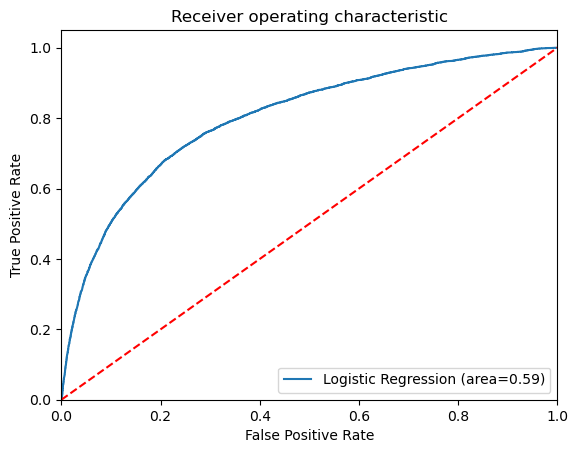

In [46]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(x)[:,-1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% log_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

In [47]:
y_prob1 = pd.DataFrame(classifier.predict_proba(x)[:,-1]) 

In [48]:
y_prob1

,0
0,0.098706
1,0.092981
2,0.103478
3,0.056242
4,0.131811
...,...
45206,0.441591
45207,0.036023
45208,0.348698
45209,0.063848


In [53]:
import statsmodels.api as sm

In [55]:
logit=sm.Logit(Y,x)

In [56]:
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.283503
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45197
Method:                           MLE   Df Model:                           13
Date:                Fri, 03 Feb 2023   Pseudo R-squ.:                  0.2144
Time:                        20:14:55   Log-Likelihood:                -12817.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0569      0.001    -48.136      0.000      -0.059      -0.055
job           -0.0350      0.005     -6.738      0.000      -0.045      -0.025
marital       -0.1885      0.025     -7.572      0.000      -0.237      -0.140
education     -0.2095      0.020    -10.432      0.000      -0.249      -0.170
balance     1.309e-05   4.89e-06      2.678      0.007    3.51e-06    2.27e-05
housing        0.7442      0.035     21.502      0.000       0.676       0.812
loan          -0.8447      0.055    -15.227      0.000      -0.953      -0.736
day           -0.0392      0.002    -20.732      0.000      -0.043      -0.035
month          0.0534      0.005     11.121      0.000       0.044       0.063
duration       0.0034   5.77e-05     59.133      0.000       0.003       0.004
campaign      -0.2208      0.011    -19.784      0.000      -0.243      -0.199
pdays         -0.0026      0.000    -11.949      0.000      -0.003      -0.002
previous      -0.0085      0.008     -1.092      0.275      -0.024       0.007
poutcome       0.9090      0.026     34.556      0.000       0.857       0.961
==============================================================================
"""

In [57]:
fpr

array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
       9.97570262e-01, 9.97570262e-01, 1.00000000e+00])

In [58]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [59]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(classifier.predict_proba(x)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(Y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls  

,thresholds,accuracy
758,5.331568e-01,0.888235
761,5.320475e-01,0.888235
656,5.644523e-01,0.888235
654,5.645643e-01,0.888235
757,5.331951e-01,0.888213
...,...,...
7686,4.041375e-05,0.121099
7687,4.007857e-05,0.121077
7688,8.214318e-06,0.119130
7689,7.939965e-06,0.119108


In [60]:
from numpy import argmax
T = tpr - fpr
ix = argmax(T)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh)) 

Best Threshold=0.134196


In [62]:
threshold = 0.134196
preds = np.where(classifier.predict_proba(x)[:,-1] > threshold, 1, 0)
print(classification_report(Y,preds))   

              precision    recall  f1-score   support

           0       0.95      0.76      0.84     39922
           1       0.28      0.72      0.40      5289

    accuracy                           0.75     45211
   macro avg       0.62      0.74      0.62     45211
weighted avg       0.87      0.75      0.79     45211

